In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[32,32,32,32,32,32] #liding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccZ' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccZ is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=32-SGD
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0895 - val_loss: 0.0827
Epoch 2/50
0s - loss: 0.0775 - val_loss: 0.0729
Epoch 3/50
0s - loss: 0.0692 - val_loss: 0.0658
Epoch 4/50
0s - loss: 0.0628 - val_loss: 0.0599
Epoch 5/50
0s - loss: 0.0572 - val_loss: 0.0545
Epoch 6/50
0s - loss: 0.0520 - val_loss: 0.0494
Epoch 7/50
0s - loss: 0.0470 - val_loss: 0.0447
Epoch 8/50
0s - loss: 0.0424 - val_loss: 0.0402
Epoch 9/50
0s - loss: 0.0382 - val_loss: 0.0361
Epoch 10/50
0s - loss: 0.0343 - val_loss: 0.0325
Epoch 11/50
0s - loss: 0.0309 - val_loss: 0.0293
Epoch 12/50
0s - loss: 0.0279 - val_loss: 0.0265
Epoch 13/50
0s - loss: 0.0253 - val_loss: 0.0241
Epoch 14/50
0s - loss: 0.0231 - val_loss: 0.0221
Epoch 15/50
0s - loss: 0.0213 - val_loss: 0.0204
Epoch 16/50
0s - loss: 0.0197 - val_loss: 0

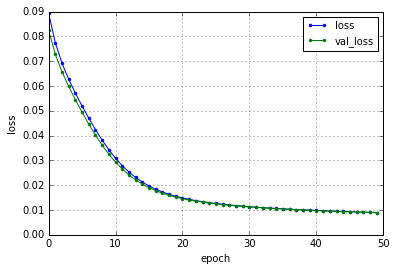

hiden node = 16
-edim=16-Window=128-Overlap=32-Adadelta
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0289 - val_loss: 0.0095
Epoch 2/50
0s - loss: 0.0078 - val_loss: 0.0065
Epoch 3/50
0s - loss: 0.0056 - val_loss: 0.0047
Epoch 4/50
0s - loss: 0.0041 - val_loss: 0.0036
Epoch 5/50
0s - loss: 0.0033 - val_loss: 0.0030
Epoch 6/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 7/50
0s - loss: 0.0026 - val_loss: 0.0026
Epoch 8/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 9/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 10/50
1s - loss: 0.0021 - val_loss: 0.0021
Epoch 11/50
0s - loss: 0.0020 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0018 - val_loss: 0.0019
Epoch 15/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 17/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 18/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 19/50
0s - loss: 

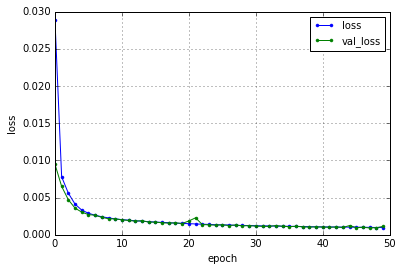

hiden node = 16
-edim=16-Window=128-Overlap=32-Adamax
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0160 - val_loss: 0.0061
Epoch 2/50
1s - loss: 0.0047 - val_loss: 0.0035
Epoch 3/50
1s - loss: 0.0030 - val_loss: 0.0026
Epoch 4/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 6/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 7/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 8/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0013 - val_loss: 0.0014
Epoch 10/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
0s - loss: 0.0010 - val_loss: 9.9805e-04
Epoch 12/50
0s - loss: 9.4850e-04 - val_loss: 0.0010
Epoch 13/50
1s - loss: 8.9120e-04 - val_loss: 8.0377e-04
Epoch 14/50
1s - loss: 8.2106e-04 - val_loss: 7.5461e-04
Epoch 15/50
1s - loss: 7.7118e-04 - val_loss: 7.2453e-04
Epoch 16/50
1s - loss: 7.4159e-04 - val_loss: 6.7353e-04
Epoch 17/50
1s - loss: 6.9654e-04 - val_loss: 6.4022e-04
Epoch 18/50
1s - loss: 6.5

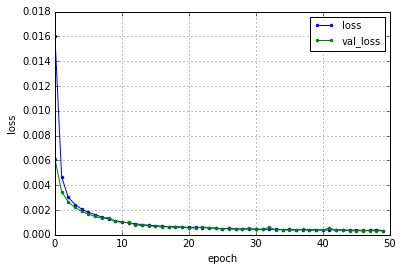

hiden node = 16
-edim=16-Window=128-Overlap=32-Adam
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0189 - val_loss: 0.0052
Epoch 2/50
1s - loss: 0.0034 - val_loss: 0.0026
Epoch 3/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 4/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 6/50
1s - loss: 0.0015 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0010
Epoch 10/50
0s - loss: 0.0010 - val_loss: 8.9801e-04
Epoch 11/50
0s - loss: 9.1401e-04 - val_loss: 8.4841e-04
Epoch 12/50
1s - loss: 8.7929e-04 - val_loss: 8.6358e-04
Epoch 13/50
1s - loss: 9.3259e-04 - val_loss: 7.5760e-04
Epoch 14/50
1s - loss: 7.2561e-04 - val_loss: 7.7441e-04
Epoch 15/50
1s - loss: 7.5279e-04 - val_loss: 8.5869e-04
Epoch 16/50
1s - loss: 7.3175e-04 - val_loss: 7.8806e-04
Epoch 17/50
1s - loss: 6.3401e-04 - val_loss: 5.8027e-04
Epoch 18/50
1s -

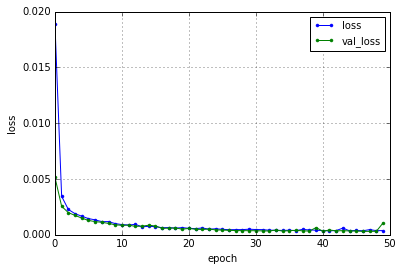

hiden node = 16
-edim=16-Window=128-Overlap=32-Adagrad
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0091 - val_loss: 0.0042
Epoch 2/50
1s - loss: 0.0035 - val_loss: 0.0029
Epoch 3/50
1s - loss: 0.0027 - val_loss: 0.0024
Epoch 4/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 5/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 6/50
1s - loss: 0.0019 - val_loss: 0.0019
Epoch 7/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 8/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 9/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 11/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 13/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0014
Epoch 15/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 16/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 17/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 19/50
1s - loss: 0

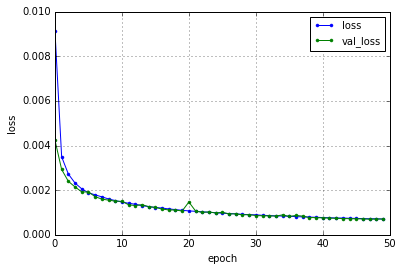

hiden node = 16
-edim=16-Window=128-Overlap=32-RMSprop
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0127 - val_loss: 0.0032
Epoch 2/50
0s - loss: 0.0028 - val_loss: 0.0021
Epoch 3/50
1s - loss: 0.0021 - val_loss: 0.0018
Epoch 4/50
0s - loss: 0.0018 - val_loss: 0.0014
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0013
Epoch 6/50
1s - loss: 0.0016 - val_loss: 0.0011
Epoch 7/50
0s - loss: 0.0015 - val_loss: 0.0011
Epoch 8/50
0s - loss: 0.0014 - val_loss: 0.0022
Epoch 9/50
0s - loss: 0.0014 - val_loss: 0.0018
Epoch 10/50
1s - loss: 0.0014 - val_loss: 8.9287e-04
Epoch 11/50
1s - loss: 0.0013 - val_loss: 0.0017
Epoch 12/50
1s - loss: 0.0013 - val_loss: 0.0023
Epoch 13/50
0s - loss: 0.0013 - val_loss: 7.9212e-04
Epoch 14/50
1s - loss: 0.0013 - val_loss: 9.7839e-04
Epoch 15/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 16/50
1s - loss: 0.0013 - val_loss: 7.6356e-04
Epoch 17/50
1s - loss: 0.0012 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0012 - val_loss: 7.9525e-04
Epoc

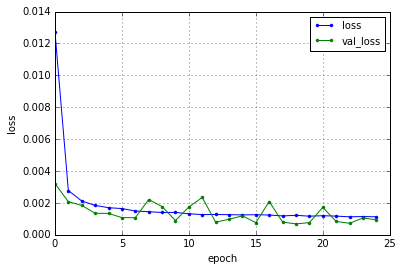

hiden node = 16
-edim=16-Window=128-Overlap=32-Nadam
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0105 - val_loss: 0.0039
Epoch 2/50
1s - loss: 0.0028 - val_loss: 0.0021
Epoch 3/50
1s - loss: 0.0022 - val_loss: 0.0016
Epoch 4/50
1s - loss: 0.0021 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0014
Epoch 6/50
1s - loss: 0.0017 - val_loss: 0.0018
Epoch 7/50
1s - loss: 0.0016 - val_loss: 0.0010
Epoch 8/50
1s - loss: 0.0014 - val_loss: 9.3077e-04
Epoch 9/50
1s - loss: 0.0013 - val_loss: 0.0038
Epoch 10/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 11/50
1s - loss: 0.0011 - val_loss: 7.9792e-04
Epoch 12/50
1s - loss: 0.0012 - val_loss: 7.0746e-04
Epoch 13/50
1s - loss: 0.0011 - val_loss: 6.9755e-04
Epoch 14/50
1s - loss: 0.0011 - val_loss: 6.5957e-04
Epoch 15/50
1s - loss: 9.2325e-04 - val_loss: 6.8115e-04
Epoch 16/50
1s - loss: 9.8223e-04 - val_loss: 6.8702e-04
Epoch 17/50
1s - loss: 0.0011 - val_loss: 0.0028
Epoch 18/50
1s - loss: 8.3109e-04 - val

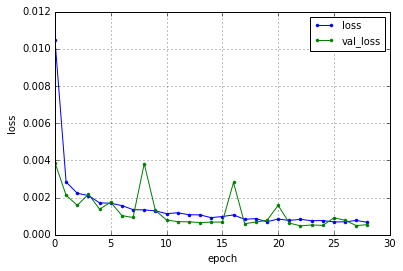

AccZ is registed now
Build Complete
(254742,)
windowData's num =7953
SourceData's aborting data = 22
window shape is (7953, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=32-SGD
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0906 - val_loss: 0.0867
Epoch 2/50
0s - loss: 0.0841 - val_loss: 0.0818
Epoch 3/50
0s - loss: 0.0802 - val_loss: 0.0787
Epoch 4/50
0s - loss: 0.0776 - val_loss: 0.0765
Epoch 5/50
0s - loss: 0.0755 - val_loss: 0.0744
Epoch 6/50
0s - loss: 0.0734 - val_loss: 0.0723
Epoch 7/50
0s - loss: 0.0711 - val_loss: 0.0699
Epoch 8/50
0s - loss: 0.0687 - val_loss: 0.0673
Epoch 9/50
0s - loss: 0.0660 - val_loss: 0.0645
Epoch 10/50
0s - loss: 0.0631 - val_loss: 0.0616
Epoch 11/50
0s - loss: 0.0600 - val_loss: 0.0585
Epoch 12/50
0s - loss: 0.0569 - val_loss: 0.0553
Epoch 13/50
0s - loss: 0.0538 - val_loss: 0.0522
Epoch 14/50
0s - loss: 0.0507 - val_loss: 0.0491
Epoch 15/50
0s - loss: 0.0476 - val_loss: 0.0462
Epoch 16/50
0s - loss: 0.0447 - val_loss: 0

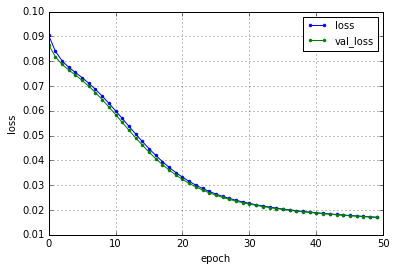

hiden node = 16
-edim=16-Window=256-Overlap=32-Adadelta
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0321 - val_loss: 0.0143
Epoch 2/50
1s - loss: 0.0113 - val_loss: 0.0091
Epoch 3/50
1s - loss: 0.0081 - val_loss: 0.0075
Epoch 4/50
0s - loss: 0.0067 - val_loss: 0.0062
Epoch 5/50
0s - loss: 0.0059 - val_loss: 0.0055
Epoch 6/50
1s - loss: 0.0053 - val_loss: 0.0050
Epoch 7/50
0s - loss: 0.0048 - val_loss: 0.0050
Epoch 8/50
0s - loss: 0.0044 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0040 - val_loss: 0.0038
Epoch 10/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 11/50
1s - loss: 0.0036 - val_loss: 0.0034
Epoch 12/50
0s - loss: 0.0034 - val_loss: 0.0039
Epoch 13/50
0s - loss: 0.0032 - val_loss: 0.0033
Epoch 14/50
0s - loss: 0.0031 - val_loss: 0.0031
Epoch 15/50
0s - loss: 0.0030 - val_loss: 0.0029
Epoch 16/50
0s - loss: 0.0029 - val_loss: 0.0032
Epoch 17/50
0s - loss: 0.0028 - val_loss: 0.0029
Epoch 18/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 19/50
0s - loss: 

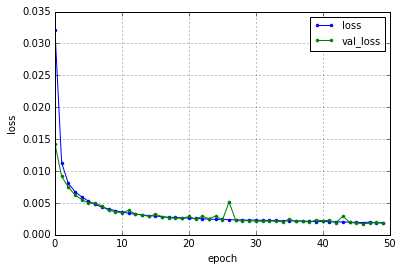

hiden node = 16
-edim=16-Window=256-Overlap=32-Adamax
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0177 - val_loss: 0.0075
Epoch 2/50
1s - loss: 0.0059 - val_loss: 0.0050
Epoch 3/50
0s - loss: 0.0043 - val_loss: 0.0039
Epoch 4/50
0s - loss: 0.0035 - val_loss: 0.0032
Epoch 5/50
0s - loss: 0.0030 - val_loss: 0.0026
Epoch 6/50
0s - loss: 0.0026 - val_loss: 0.0025
Epoch 7/50
1s - loss: 0.0023 - val_loss: 0.0023
Epoch 8/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0018
Epoch 10/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 12/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 13/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0017
Epoch 15/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 17/50
1s - loss: 0.0011 - val_loss: 0.0013
Epoch 18/50
1s - loss: 0.0011 - val_loss: 9.9737e-04
Epoch 19/50
1s - loss

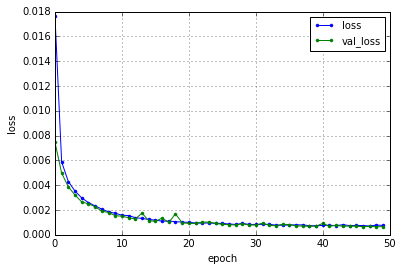

hiden node = 16
-edim=16-Window=256-Overlap=32-Adam
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0192 - val_loss: 0.0070
Epoch 2/50
1s - loss: 0.0052 - val_loss: 0.0039
Epoch 3/50
0s - loss: 0.0036 - val_loss: 0.0032
Epoch 4/50
0s - loss: 0.0028 - val_loss: 0.0025
Epoch 5/50
0s - loss: 0.0023 - val_loss: 0.0020
Epoch 6/50
1s - loss: 0.0022 - val_loss: 0.0018
Epoch 7/50
1s - loss: 0.0018 - val_loss: 0.0023
Epoch 8/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 9/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 11/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 12/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 14/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 15/50
1s - loss: 0.0013 - val_loss: 0.0015
Epoch 16/50
1s - loss: 0.0011 - val_loss: 9.6420e-04
Epoch 17/50
1s - loss: 0.0010 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0010 - val_loss: 9.6964e-04
Epoch 19/50
1s - lo

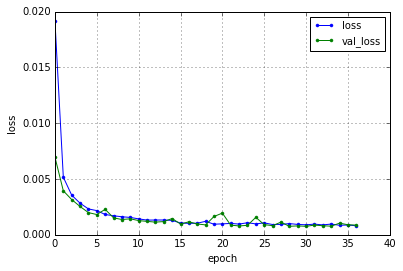

hiden node = 16
-edim=16-Window=256-Overlap=32-Adagrad
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0122 - val_loss: 0.0060
Epoch 2/50
1s - loss: 0.0051 - val_loss: 0.0042
Epoch 3/50
1s - loss: 0.0040 - val_loss: 0.0038
Epoch 4/50
1s - loss: 0.0035 - val_loss: 0.0032
Epoch 5/50
1s - loss: 0.0031 - val_loss: 0.0029
Epoch 6/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 7/50
1s - loss: 0.0027 - val_loss: 0.0026
Epoch 8/50
0s - loss: 0.0026 - val_loss: 0.0024
Epoch 9/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 11/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 12/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 13/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 14/50
0s - loss: 0.0020 - val_loss: 0.0022
Epoch 15/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 16/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 17/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 18/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 19/50
1s - loss: 0

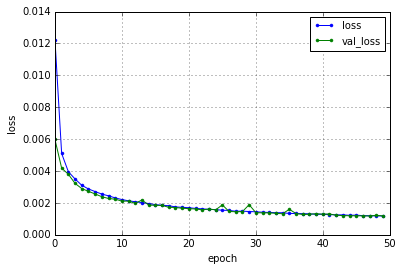

hiden node = 16
-edim=16-Window=256-Overlap=32-RMSprop
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0152 - val_loss: 0.0047
Epoch 2/50
0s - loss: 0.0047 - val_loss: 0.0036
Epoch 3/50
0s - loss: 0.0040 - val_loss: 0.0030
Epoch 4/50
0s - loss: 0.0035 - val_loss: 0.0029
Epoch 5/50
0s - loss: 0.0032 - val_loss: 0.0026
Epoch 6/50
0s - loss: 0.0031 - val_loss: 0.0029
Epoch 7/50
0s - loss: 0.0029 - val_loss: 0.0021
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0023
Epoch 9/50
0s - loss: 0.0027 - val_loss: 0.0022
Epoch 10/50
0s - loss: 0.0027 - val_loss: 0.0020
Epoch 11/50
0s - loss: 0.0027 - val_loss: 0.0018
Epoch 12/50
0s - loss: 0.0027 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0027 - val_loss: 0.0024
Epoch 14/50
0s - loss: 0.0026 - val_loss: 0.0051
Epoch 15/50
0s - loss: 0.0025 - val_loss: 0.0094
Epoch 16/50
0s - loss: 0.0025 - val_loss: 0.0020
Epoch 17/50
0s - loss: 0.0025 - val_loss: 0.0018


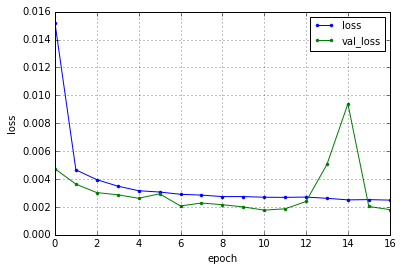

hiden node = 16
-edim=16-Window=256-Overlap=32-Nadam
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0138 - val_loss: 0.0048
Epoch 2/50
0s - loss: 0.0049 - val_loss: 0.0032
Epoch 3/50
0s - loss: 0.0040 - val_loss: 0.0027
Epoch 4/50
0s - loss: 0.0035 - val_loss: 0.0027
Epoch 5/50
0s - loss: 0.0030 - val_loss: 0.0023
Epoch 6/50
0s - loss: 0.0030 - val_loss: 0.0021
Epoch 7/50
0s - loss: 0.0025 - val_loss: 0.0070
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0017
Epoch 9/50
0s - loss: 0.0026 - val_loss: 0.0030
Epoch 10/50
0s - loss: 0.0023 - val_loss: 0.0018
Epoch 11/50
0s - loss: 0.0023 - val_loss: 0.0041
Epoch 12/50
0s - loss: 0.0023 - val_loss: 0.0016
Epoch 13/50
0s - loss: 0.0021 - val_loss: 0.0024
Epoch 14/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 15/50
0s - loss: 0.0019 - val_loss: 0.0015
Epoch 16/50
0s - loss: 0.0020 - val_loss: 0.0017
Epoch 17/50
0s - loss: 0.0019 - val_loss: 0.0012
Epoch 18/50
0s - loss: 0.0019 - val_loss: 0.0012
Epoch 19/50
0s - loss: 0.0

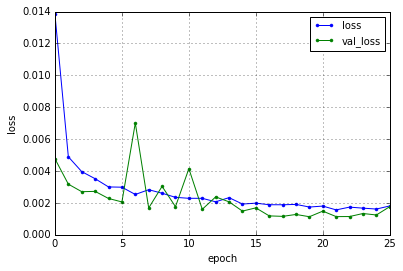

AccZ is registed now
Build Complete
(254742,)
windowData's num =7945
SourceData's aborting data = 22
window shape is (7945, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=32-SGD
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.0864 - val_loss: 0.0847
Epoch 2/50
1s - loss: 0.0834 - val_loss: 0.0822
Epoch 3/50
0s - loss: 0.0812 - val_loss: 0.0803
Epoch 4/50
0s - loss: 0.0795 - val_loss: 0.0787
Epoch 5/50
1s - loss: 0.0780 - val_loss: 0.0773
Epoch 6/50
1s - loss: 0.0766 - val_loss: 0.0758
Epoch 7/50
1s - loss: 0.0751 - val_loss: 0.0744
Epoch 8/50
1s - loss: 0.0736 - val_loss: 0.0728
Epoch 9/50
1s - loss: 0.0720 - val_loss: 0.0712
Epoch 10/50
1s - loss: 0.0703 - val_loss: 0.0694
Epoch 11/50
1s - loss: 0.0685 - val_loss: 0.0676
Epoch 12/50
1s - loss: 0.0667 - val_loss: 0.0657
Epoch 13/50
1s - loss: 0.0648 - val_loss: 0.0638
Epoch 14/50
1s - loss: 0.0628 - val_loss: 0.0618
Epoch 15/50
0s - loss: 0.0609 - val_loss: 0.0599
Epoch 16/50
1s - loss: 0.0589 - val_loss: 0

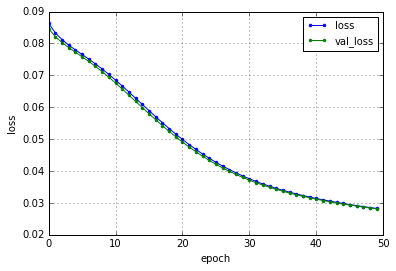

hiden node = 16
-edim=16-Window=512-Overlap=32-Adadelta
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.0417 - val_loss: 0.0224
Epoch 2/50
0s - loss: 0.0188 - val_loss: 0.0160
Epoch 3/50
0s - loss: 0.0140 - val_loss: 0.0123
Epoch 4/50
0s - loss: 0.0113 - val_loss: 0.0104
Epoch 5/50
1s - loss: 0.0098 - val_loss: 0.0094
Epoch 6/50
1s - loss: 0.0088 - val_loss: 0.0087
Epoch 7/50
1s - loss: 0.0081 - val_loss: 0.0076
Epoch 8/50
1s - loss: 0.0075 - val_loss: 0.0075
Epoch 9/50
1s - loss: 0.0070 - val_loss: 0.0080
Epoch 10/50
1s - loss: 0.0066 - val_loss: 0.0063
Epoch 11/50
0s - loss: 0.0062 - val_loss: 0.0061
Epoch 12/50
0s - loss: 0.0060 - val_loss: 0.0061
Epoch 13/50
1s - loss: 0.0057 - val_loss: 0.0056
Epoch 14/50
1s - loss: 0.0055 - val_loss: 0.0053
Epoch 15/50
0s - loss: 0.0054 - val_loss: 0.0052
Epoch 16/50
0s - loss: 0.0052 - val_loss: 0.0053
Epoch 17/50
1s - loss: 0.0051 - val_loss: 0.0057
Epoch 18/50
1s - loss: 0.0049 - val_loss: 0.0047
Epoch 19/50
1s - loss: 

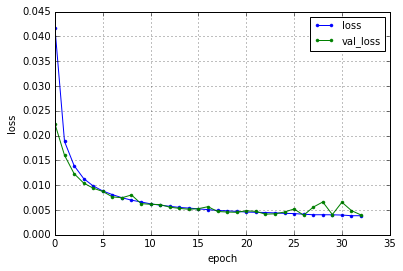

hiden node = 16
-edim=16-Window=512-Overlap=32-Adamax
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.0192 - val_loss: 0.0097
Epoch 2/50
1s - loss: 0.0080 - val_loss: 0.0065
Epoch 3/50
1s - loss: 0.0056 - val_loss: 0.0048
Epoch 4/50
1s - loss: 0.0046 - val_loss: 0.0043
Epoch 5/50
1s - loss: 0.0040 - val_loss: 0.0038
Epoch 6/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 7/50
1s - loss: 0.0030 - val_loss: 0.0029
Epoch 8/50
1s - loss: 0.0027 - val_loss: 0.0033
Epoch 9/50
1s - loss: 0.0025 - val_loss: 0.0025
Epoch 10/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 11/50
0s - loss: 0.0022 - val_loss: 0.0022
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0022
Epoch 13/50
1s - loss: 0.0020 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0020 - val_loss: 0.0023
Epoch 15/50
1s - loss: 0.0019 - val_loss: 0.0019
Epoch 16/50
1s - loss: 0.0018 - val_loss: 0.0023
Epoch 17/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 18/50
1s - loss: 0.0017 - val_loss: 0.0021
Epoch 19/50
1s - loss: 0.

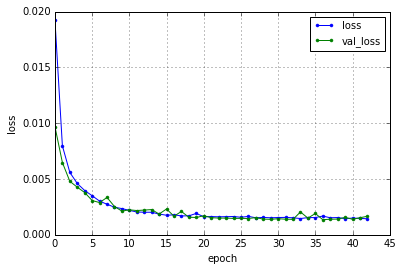

hiden node = 16
-edim=16-Window=512-Overlap=32-Adam
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.0196 - val_loss: 0.0085
Epoch 2/50
1s - loss: 0.0066 - val_loss: 0.0050
Epoch 3/50
1s - loss: 0.0049 - val_loss: 0.0039
Epoch 4/50
1s - loss: 0.0038 - val_loss: 0.0034
Epoch 5/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 6/50
1s - loss: 0.0029 - val_loss: 0.0028
Epoch 7/50
0s - loss: 0.0029 - val_loss: 0.0039
Epoch 8/50
1s - loss: 0.0026 - val_loss: 0.0027
Epoch 9/50
1s - loss: 0.0025 - val_loss: 0.0020
Epoch 10/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 11/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0018
Epoch 13/50
1s - loss: 0.0022 - val_loss: 0.0020
Epoch 14/50
1s - loss: 0.0022 - val_loss: 0.0024
Epoch 15/50
1s - loss: 0.0021 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 17/50
0s - loss: 0.0018 - val_loss: 0.0016
Epoch 18/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 19/50
1s - loss: 0.00

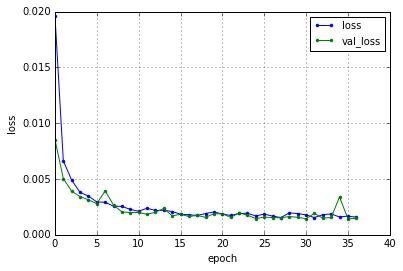

hiden node = 16
-edim=16-Window=512-Overlap=32-Adagrad
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0164 - val_loss: 0.0086
Epoch 2/50
0s - loss: 0.0077 - val_loss: 0.0064
Epoch 3/50
0s - loss: 0.0061 - val_loss: 0.0082
Epoch 4/50
0s - loss: 0.0053 - val_loss: 0.0050
Epoch 5/50
0s - loss: 0.0047 - val_loss: 0.0046
Epoch 6/50
0s - loss: 0.0043 - val_loss: 0.0041
Epoch 7/50
0s - loss: 0.0042 - val_loss: 0.0039
Epoch 8/50
0s - loss: 0.0039 - val_loss: 0.0042
Epoch 9/50
0s - loss: 0.0036 - val_loss: 0.0036
Epoch 10/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 11/50
0s - loss: 0.0034 - val_loss: 0.0035
Epoch 12/50
0s - loss: 0.0033 - val_loss: 0.0030
Epoch 13/50
0s - loss: 0.0032 - val_loss: 0.0030
Epoch 14/50
0s - loss: 0.0030 - val_loss: 0.0033
Epoch 15/50
0s - loss: 0.0030 - val_loss: 0.0032
Epoch 16/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 17/50
0s - loss: 0.0028 - val_loss: 0.0027
Epoch 18/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 19/50
0s - loss: 0

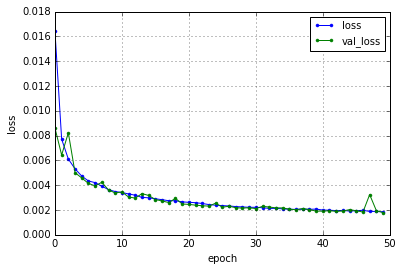

hiden node = 16
-edim=16-Window=512-Overlap=32-RMSprop
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0180 - val_loss: 0.0073
Epoch 2/50
0s - loss: 0.0076 - val_loss: 0.0053
Epoch 3/50
0s - loss: 0.0062 - val_loss: 0.0134
Epoch 4/50
0s - loss: 0.0058 - val_loss: 0.0098
Epoch 5/50
0s - loss: 0.0055 - val_loss: 0.0093
Epoch 6/50
0s - loss: 0.0052 - val_loss: 0.0034
Epoch 7/50
0s - loss: 0.0050 - val_loss: 0.0033
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0032
Epoch 9/50
0s - loss: 0.0049 - val_loss: 0.0039
Epoch 10/50
0s - loss: 0.0048 - val_loss: 0.0043
Epoch 11/50
0s - loss: 0.0047 - val_loss: 0.0036
Epoch 12/50
0s - loss: 0.0046 - val_loss: 0.0079
Epoch 13/50
0s - loss: 0.0047 - val_loss: 0.0033
Epoch 14/50
0s - loss: 0.0046 - val_loss: 0.0078


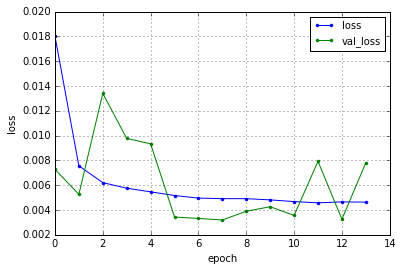

hiden node = 16
-edim=16-Window=512-Overlap=32-Nadam
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0162 - val_loss: 0.0078
Epoch 2/50
0s - loss: 0.0078 - val_loss: 0.0053
Epoch 3/50
0s - loss: 0.0067 - val_loss: 0.0051
Epoch 4/50
0s - loss: 0.0058 - val_loss: 0.0040
Epoch 5/50
0s - loss: 0.0055 - val_loss: 0.0049
Epoch 6/50
0s - loss: 0.0049 - val_loss: 0.0107
Epoch 7/50
0s - loss: 0.0051 - val_loss: 0.0039
Epoch 8/50
0s - loss: 0.0045 - val_loss: 0.0238
Epoch 9/50
0s - loss: 0.0044 - val_loss: 0.0076
Epoch 10/50
0s - loss: 0.0046 - val_loss: 0.0035
Epoch 11/50
0s - loss: 0.0042 - val_loss: 0.0062
Epoch 12/50
0s - loss: 0.0040 - val_loss: 0.0067
Epoch 13/50
0s - loss: 0.0040 - val_loss: 0.0026
Epoch 14/50
0s - loss: 0.0041 - val_loss: 0.0048
Epoch 15/50
0s - loss: 0.0038 - val_loss: 0.0043
Epoch 16/50
0s - loss: 0.0037 - val_loss: 0.0029
Epoch 17/50
0s - loss: 0.0038 - val_loss: 0.0029
Epoch 18/50
0s - loss: 0.0033 - val_loss: 0.0027
Epoch 19/50
0s - loss: 0.0

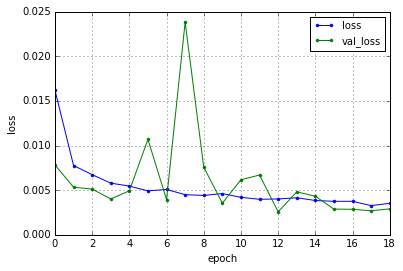

AccZ is registed now
Build Complete
(254742,)
windowData's num =7929
SourceData's aborting data = 22
window shape is (7929, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=32-SGD
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0832 - val_loss: 0.0826
Epoch 2/50
0s - loss: 0.0821 - val_loss: 0.0817
Epoch 3/50
0s - loss: 0.0813 - val_loss: 0.0810
Epoch 4/50
0s - loss: 0.0807 - val_loss: 0.0804
Epoch 5/50
0s - loss: 0.0801 - val_loss: 0.0798
Epoch 6/50
0s - loss: 0.0795 - val_loss: 0.0792
Epoch 7/50
0s - loss: 0.0789 - val_loss: 0.0786
Epoch 8/50
0s - loss: 0.0783 - val_loss: 0.0780
Epoch 9/50
0s - loss: 0.0777 - val_loss: 0.0774
Epoch 10/50
1s - loss: 0.0770 - val_loss: 0.0766
Epoch 11/50
1s - loss: 0.0763 - val_loss: 0.0759
Epoch 12/50
1s - loss: 0.0755 - val_loss: 0.0751
Epoch 13/50
0s - loss: 0.0747 - val_loss: 0.0743
Epoch 14/50
0s - loss: 0.0739 - val_loss: 0.0734
Epoch 15/50
0s - loss: 0.0730 - val_loss: 0.0725
Epoch 16/50
0s - loss: 0.0721 - val_loss:

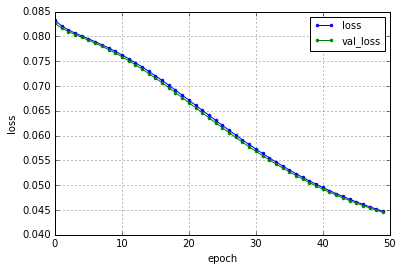

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adadelta
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0536 - val_loss: 0.0345
Epoch 2/50
0s - loss: 0.0300 - val_loss: 0.0263
Epoch 3/50
0s - loss: 0.0237 - val_loss: 0.0217
Epoch 4/50
0s - loss: 0.0201 - val_loss: 0.0189
Epoch 5/50
0s - loss: 0.0178 - val_loss: 0.0171
Epoch 6/50
0s - loss: 0.0161 - val_loss: 0.0157
Epoch 7/50
0s - loss: 0.0149 - val_loss: 0.0142
Epoch 8/50
1s - loss: 0.0138 - val_loss: 0.0134
Epoch 9/50
0s - loss: 0.0129 - val_loss: 0.0131
Epoch 10/50
1s - loss: 0.0123 - val_loss: 0.0122
Epoch 11/50
1s - loss: 0.0117 - val_loss: 0.0119
Epoch 12/50
1s - loss: 0.0112 - val_loss: 0.0108
Epoch 13/50
1s - loss: 0.0108 - val_loss: 0.0136
Epoch 14/50
1s - loss: 0.0104 - val_loss: 0.0100
Epoch 15/50
1s - loss: 0.0102 - val_loss: 0.0101
Epoch 16/50
1s - loss: 0.0098 - val_loss: 0.0094
Epoch 17/50
1s - loss: 0.0095 - val_loss: 0.0091
Epoch 18/50
1s - loss: 0.0093 - val_loss: 0.0089
Epoch 19/50
1s - loss:

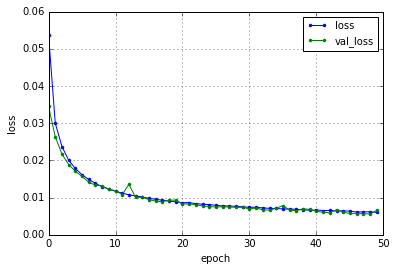

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adamax
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0247 - val_loss: 0.0141
Epoch 2/50
0s - loss: 0.0114 - val_loss: 0.0092
Epoch 3/50
1s - loss: 0.0082 - val_loss: 0.0071
Epoch 4/50
0s - loss: 0.0066 - val_loss: 0.0058
Epoch 5/50
0s - loss: 0.0056 - val_loss: 0.0050
Epoch 6/50
1s - loss: 0.0049 - val_loss: 0.0047
Epoch 7/50
1s - loss: 0.0045 - val_loss: 0.0041
Epoch 8/50
1s - loss: 0.0043 - val_loss: 0.0040
Epoch 9/50
1s - loss: 0.0040 - val_loss: 0.0041
Epoch 10/50
0s - loss: 0.0038 - val_loss: 0.0039
Epoch 11/50
1s - loss: 0.0036 - val_loss: 0.0034
Epoch 12/50
1s - loss: 0.0036 - val_loss: 0.0033
Epoch 13/50
0s - loss: 0.0034 - val_loss: 0.0037
Epoch 14/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 15/50
0s - loss: 0.0034 - val_loss: 0.0046
Epoch 16/50
1s - loss: 0.0034 - val_loss: 0.0031
Epoch 17/50
1s - loss: 0.0032 - val_loss: 0.0033
Epoch 18/50
1s - loss: 0.0033 - val_loss: 0.0039
Epoch 19/50
1s - loss: 0

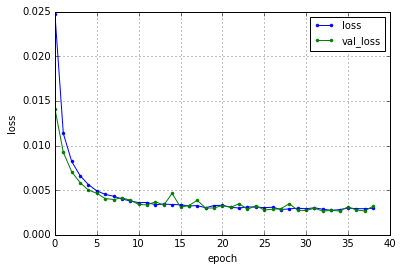

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adam
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0236 - val_loss: 0.0111
Epoch 2/50
0s - loss: 0.0099 - val_loss: 0.0080
Epoch 3/50
0s - loss: 0.0070 - val_loss: 0.0072
Epoch 4/50
0s - loss: 0.0062 - val_loss: 0.0049
Epoch 5/50
0s - loss: 0.0053 - val_loss: 0.0060
Epoch 6/50
0s - loss: 0.0049 - val_loss: 0.0056
Epoch 7/50
0s - loss: 0.0046 - val_loss: 0.0046
Epoch 8/50
0s - loss: 0.0045 - val_loss: 0.0041
Epoch 9/50
0s - loss: 0.0043 - val_loss: 0.0036
Epoch 10/50
0s - loss: 0.0043 - val_loss: 0.0035
Epoch 11/50
0s - loss: 0.0042 - val_loss: 0.0035
Epoch 12/50
0s - loss: 0.0040 - val_loss: 0.0033
Epoch 13/50
0s - loss: 0.0042 - val_loss: 0.0057
Epoch 14/50
0s - loss: 0.0038 - val_loss: 0.0039
Epoch 15/50
0s - loss: 0.0040 - val_loss: 0.0047
Epoch 16/50
0s - loss: 0.0044 - val_loss: 0.0035
Epoch 17/50
0s - loss: 0.0035 - val_loss: 0.0047
Epoch 18/50
0s - loss: 0.0040 - val_loss: 0.0031
Epoch 19/50
0s - loss: 0.0

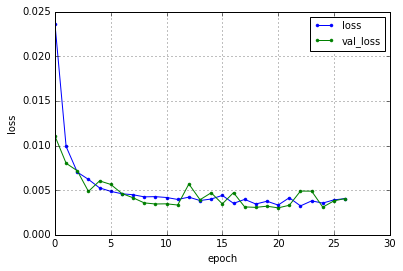

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adagrad
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0220 - val_loss: 0.0124
Epoch 2/50
0s - loss: 0.0116 - val_loss: 0.0108
Epoch 3/50
0s - loss: 0.0096 - val_loss: 0.0088
Epoch 4/50
0s - loss: 0.0081 - val_loss: 0.0078
Epoch 5/50
0s - loss: 0.0072 - val_loss: 0.0064
Epoch 6/50
0s - loss: 0.0068 - val_loss: 0.0065
Epoch 7/50
0s - loss: 0.0061 - val_loss: 0.0058
Epoch 8/50
0s - loss: 0.0059 - val_loss: 0.0056
Epoch 9/50
0s - loss: 0.0057 - val_loss: 0.0053
Epoch 10/50
0s - loss: 0.0053 - val_loss: 0.0054
Epoch 11/50
0s - loss: 0.0051 - val_loss: 0.0046
Epoch 12/50
0s - loss: 0.0050 - val_loss: 0.0049
Epoch 13/50
0s - loss: 0.0048 - val_loss: 0.0052
Epoch 14/50
0s - loss: 0.0046 - val_loss: 0.0043
Epoch 15/50
0s - loss: 0.0048 - val_loss: 0.0049
Epoch 16/50
0s - loss: 0.0045 - val_loss: 0.0042
Epoch 17/50
0s - loss: 0.0044 - val_loss: 0.0044
Epoch 18/50
0s - loss: 0.0045 - val_loss: 0.0043
Epoch 19/50
0s - loss: 

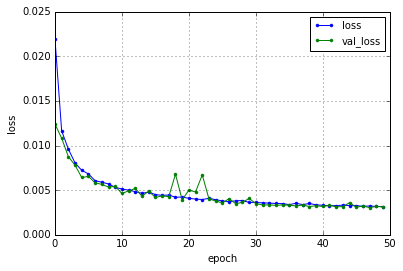

hiden node = 16
-edim=16-Window=1024-Overlap=32-RMSprop
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0230 - val_loss: 0.0121
Epoch 2/50
0s - loss: 0.0124 - val_loss: 0.0084
Epoch 3/50
0s - loss: 0.0104 - val_loss: 0.0070
Epoch 4/50
0s - loss: 0.0096 - val_loss: 0.0071
Epoch 5/50
0s - loss: 0.0093 - val_loss: 0.0067
Epoch 6/50
0s - loss: 0.0089 - val_loss: 0.0069
Epoch 7/50
0s - loss: 0.0088 - val_loss: 0.0066
Epoch 8/50
0s - loss: 0.0087 - val_loss: 0.0077
Epoch 9/50
0s - loss: 0.0085 - val_loss: 0.0087
Epoch 10/50
0s - loss: 0.0086 - val_loss: 0.0064
Epoch 11/50
0s - loss: 0.0086 - val_loss: 0.0059
Epoch 12/50
0s - loss: 0.0083 - val_loss: 0.0061
Epoch 13/50
0s - loss: 0.0082 - val_loss: 0.0052
Epoch 14/50
0s - loss: 0.0085 - val_loss: 0.0054
Epoch 15/50
0s - loss: 0.0082 - val_loss: 0.0056
Epoch 16/50
0s - loss: 0.0083 - val_loss: 0.0064
Epoch 17/50
0s - loss: 0.0081 - val_loss: 0.0053
Epoch 18/50
1s - loss: 0.0082 - val_loss: 0.0089
Epoch 19/50
1s - loss: 

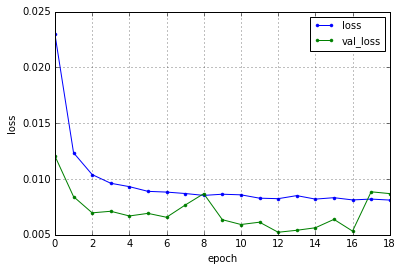

hiden node = 16
-edim=16-Window=1024-Overlap=32-Nadam
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0225 - val_loss: 0.0144
Epoch 2/50
0s - loss: 0.0130 - val_loss: 0.0091
Epoch 3/50
0s - loss: 0.0109 - val_loss: 0.0084
Epoch 4/50
0s - loss: 0.0099 - val_loss: 0.0073
Epoch 5/50
0s - loss: 0.0106 - val_loss: 0.0069
Epoch 6/50
0s - loss: 0.0096 - val_loss: 0.0073
Epoch 7/50
0s - loss: 0.0088 - val_loss: 0.0080
Epoch 8/50
0s - loss: 0.0091 - val_loss: 0.0065
Epoch 9/50
0s - loss: 0.0088 - val_loss: 0.0069
Epoch 10/50
0s - loss: 0.0083 - val_loss: 0.0077
Epoch 11/50
0s - loss: 0.0091 - val_loss: 0.0080
Epoch 12/50
0s - loss: 0.0087 - val_loss: 0.0082
Epoch 13/50
0s - loss: 0.0075 - val_loss: 0.0054
Epoch 14/50
0s - loss: 0.0078 - val_loss: 0.0067
Epoch 15/50
0s - loss: 0.0073 - val_loss: 0.0055
Epoch 16/50
0s - loss: 0.0075 - val_loss: 0.0050
Epoch 17/50
0s - loss: 0.0074 - val_loss: 0.0051
Epoch 18/50
0s - loss: 0.0070 - val_loss: 0.0146
Epoch 19/50
1s - loss: 0.

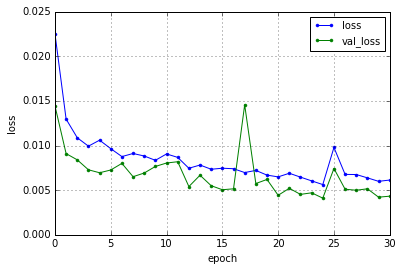

AccZ is registed now
Build Complete
(254742,)
windowData's num =7897
SourceData's aborting data = 22
window shape is (7897, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=32-SGD
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0835 - val_loss: 0.0832
Epoch 2/50
1s - loss: 0.0830 - val_loss: 0.0827
Epoch 3/50
1s - loss: 0.0826 - val_loss: 0.0824
Epoch 4/50
1s - loss: 0.0822 - val_loss: 0.0821
Epoch 5/50
1s - loss: 0.0820 - val_loss: 0.0819
Epoch 6/50
1s - loss: 0.0818 - val_loss: 0.0816
Epoch 7/50
1s - loss: 0.0815 - val_loss: 0.0814
Epoch 8/50
2s - loss: 0.0813 - val_loss: 0.0812
Epoch 9/50
1s - loss: 0.0811 - val_loss: 0.0809
Epoch 10/50
2s - loss: 0.0808 - val_loss: 0.0807
Epoch 11/50
2s - loss: 0.0805 - val_loss: 0.0804
Epoch 12/50
2s - loss: 0.0803 - val_loss: 0.0801
Epoch 13/50
1s - loss: 0.0800 - val_loss: 0.0798
Epoch 14/50
2s - loss: 0.0796 - val_loss: 0.0795
Epoch 15/50
2s - loss: 0.0793 - val_loss: 0.0791
Epoch 16/50
1s - loss: 0.0789 - val_loss:

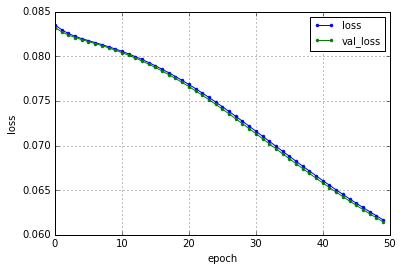

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adadelta
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0643 - val_loss: 0.0496
Epoch 2/50
2s - loss: 0.0447 - val_loss: 0.0408
Epoch 3/50
1s - loss: 0.0378 - val_loss: 0.0349
Epoch 4/50
1s - loss: 0.0326 - val_loss: 0.0305
Epoch 5/50
1s - loss: 0.0289 - val_loss: 0.0274
Epoch 6/50
1s - loss: 0.0261 - val_loss: 0.0248
Epoch 7/50
1s - loss: 0.0239 - val_loss: 0.0230
Epoch 8/50
1s - loss: 0.0224 - val_loss: 0.0216
Epoch 9/50
1s - loss: 0.0211 - val_loss: 0.0207
Epoch 10/50
1s - loss: 0.0202 - val_loss: 0.0205
Epoch 11/50
1s - loss: 0.0194 - val_loss: 0.0189
Epoch 12/50
1s - loss: 0.0188 - val_loss: 0.0182
Epoch 13/50
1s - loss: 0.0183 - val_loss: 0.0177
Epoch 14/50
1s - loss: 0.0177 - val_loss: 0.0172
Epoch 15/50
1s - loss: 0.0172 - val_loss: 0.0169
Epoch 16/50
2s - loss: 0.0168 - val_loss: 0.0169
Epoch 17/50
1s - loss: 0.0165 - val_loss: 0.0164
Epoch 18/50
1s - loss: 0.0161 - val_loss: 0.0155
Epoch 19/50
1s - loss:

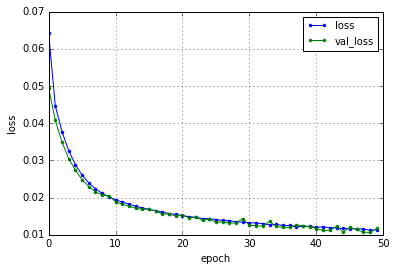

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adamax
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0273 - val_loss: 0.0174
Epoch 2/50
1s - loss: 0.0150 - val_loss: 0.0126
Epoch 3/50
1s - loss: 0.0121 - val_loss: 0.0128
Epoch 4/50
1s - loss: 0.0101 - val_loss: 0.0112
Epoch 5/50
2s - loss: 0.0089 - val_loss: 0.0081
Epoch 6/50
1s - loss: 0.0085 - val_loss: 0.0075
Epoch 7/50
2s - loss: 0.0082 - val_loss: 0.0076
Epoch 8/50
1s - loss: 0.0073 - val_loss: 0.0070
Epoch 9/50
1s - loss: 0.0071 - val_loss: 0.0073
Epoch 10/50
2s - loss: 0.0071 - val_loss: 0.0073
Epoch 11/50
1s - loss: 0.0069 - val_loss: 0.0062
Epoch 12/50
1s - loss: 0.0067 - val_loss: 0.0065
Epoch 13/50
1s - loss: 0.0070 - val_loss: 0.0065
Epoch 14/50
2s - loss: 0.0069 - val_loss: 0.0095
Epoch 15/50
1s - loss: 0.0065 - val_loss: 0.0061
Epoch 16/50
2s - loss: 0.0064 - val_loss: 0.0066
Epoch 17/50
1s - loss: 0.0063 - val_loss: 0.0064
Epoch 18/50
1s - loss: 0.0065 - val_loss: 0.0059
Epoch 19/50
1s - loss: 0

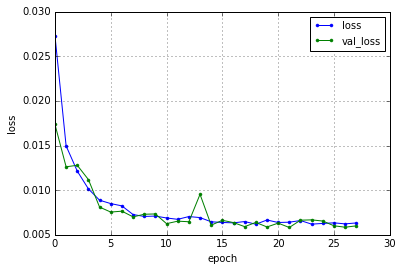

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adam
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0273 - val_loss: 0.0170
Epoch 2/50
1s - loss: 0.0141 - val_loss: 0.0116
Epoch 3/50
1s - loss: 0.0109 - val_loss: 0.0155
Epoch 4/50
1s - loss: 0.0099 - val_loss: 0.0083
Epoch 5/50
1s - loss: 0.0094 - val_loss: 0.0082
Epoch 6/50
1s - loss: 0.0084 - val_loss: 0.0075
Epoch 7/50
1s - loss: 0.0080 - val_loss: 0.0071
Epoch 8/50
2s - loss: 0.0090 - val_loss: 0.0077
Epoch 9/50
1s - loss: 0.0093 - val_loss: 0.0093
Epoch 10/50
2s - loss: 0.0091 - val_loss: 0.0075
Epoch 11/50
1s - loss: 0.0079 - val_loss: 0.0076
Epoch 12/50
1s - loss: 0.0084 - val_loss: 0.0072
Epoch 13/50
1s - loss: 0.0082 - val_loss: 0.0070
Epoch 14/50
1s - loss: 0.0076 - val_loss: 0.0132
Epoch 15/50
1s - loss: 0.0089 - val_loss: 0.0069
Epoch 16/50
2s - loss: 0.0076 - val_loss: 0.0084
Epoch 17/50
1s - loss: 0.0079 - val_loss: 0.0077
Epoch 18/50
1s - loss: 0.0076 - val_loss: 0.0066
Epoch 19/50
2s - loss: 0.0

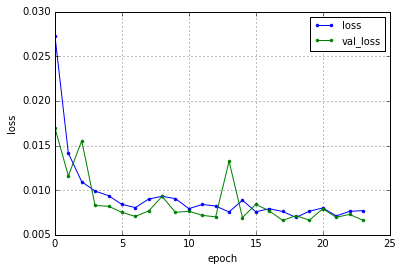

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adagrad
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0280 - val_loss: 0.0177
Epoch 2/50
1s - loss: 0.0167 - val_loss: 0.0134
Epoch 3/50
1s - loss: 0.0140 - val_loss: 0.0119
Epoch 4/50
1s - loss: 0.0126 - val_loss: 0.0107
Epoch 5/50
2s - loss: 0.0114 - val_loss: 0.0115
Epoch 6/50
1s - loss: 0.0108 - val_loss: 0.0095
Epoch 7/50
1s - loss: 0.0103 - val_loss: 0.0098
Epoch 8/50
1s - loss: 0.0093 - val_loss: 0.0094
Epoch 9/50
1s - loss: 0.0091 - val_loss: 0.0082
Epoch 10/50
1s - loss: 0.0088 - val_loss: 0.0079
Epoch 11/50
1s - loss: 0.0087 - val_loss: 0.0081
Epoch 12/50
1s - loss: 0.0083 - val_loss: 0.0091
Epoch 13/50
1s - loss: 0.0081 - val_loss: 0.0103
Epoch 14/50
1s - loss: 0.0084 - val_loss: 0.0073
Epoch 15/50
1s - loss: 0.0078 - val_loss: 0.0093
Epoch 16/50
1s - loss: 0.0078 - val_loss: 0.0098
Epoch 17/50
2s - loss: 0.0076 - val_loss: 0.0081
Epoch 18/50
2s - loss: 0.0076 - val_loss: 0.0073
Epoch 19/50
1s - loss: 

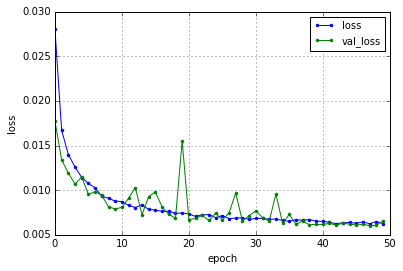

hiden node = 16
-edim=16-Window=2048-Overlap=32-RMSprop
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0292 - val_loss: 0.0243
Epoch 2/50
2s - loss: 0.0186 - val_loss: 0.0192
Epoch 3/50
1s - loss: 0.0167 - val_loss: 0.0126
Epoch 4/50
2s - loss: 0.0156 - val_loss: 0.0144
Epoch 5/50
1s - loss: 0.0155 - val_loss: 0.0169
Epoch 6/50
1s - loss: 0.0151 - val_loss: 0.0157
Epoch 7/50
1s - loss: 0.0153 - val_loss: 0.0132
Epoch 8/50
1s - loss: 0.0151 - val_loss: 0.0110
Epoch 9/50
2s - loss: 0.0149 - val_loss: 0.0160
Epoch 10/50
1s - loss: 0.0150 - val_loss: 0.0138
Epoch 11/50
1s - loss: 0.0151 - val_loss: 0.0200
Epoch 12/50
1s - loss: 0.0146 - val_loss: 0.0169
Epoch 13/50
1s - loss: 0.0148 - val_loss: 0.0146
Epoch 14/50
1s - loss: 0.0147 - val_loss: 0.0146


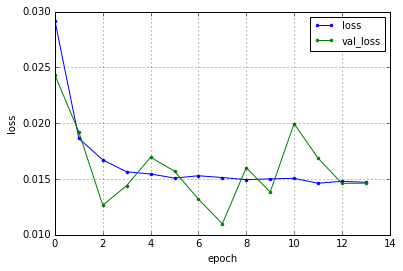

hiden node = 16
-edim=16-Window=2048-Overlap=32-Nadam
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0301 - val_loss: 0.0190
Epoch 2/50
1s - loss: 0.0222 - val_loss: 0.0160
Epoch 3/50
2s - loss: 0.0205 - val_loss: 0.0163
Epoch 4/50
1s - loss: 0.0189 - val_loss: 0.0154
Epoch 5/50
1s - loss: 0.0197 - val_loss: 0.0169
Epoch 6/50
1s - loss: 0.0189 - val_loss: 0.0197
Epoch 7/50
1s - loss: 0.0172 - val_loss: 0.0161
Epoch 8/50
1s - loss: 0.0184 - val_loss: 0.0181
Epoch 9/50
1s - loss: 0.0166 - val_loss: 0.0126
Epoch 10/50
1s - loss: 0.0166 - val_loss: 0.0136
Epoch 11/50
1s - loss: 0.0152 - val_loss: 0.0144
Epoch 12/50
2s - loss: 0.0155 - val_loss: 0.0116
Epoch 13/50
1s - loss: 0.0169 - val_loss: 0.0185
Epoch 14/50
1s - loss: 0.0162 - val_loss: 0.0242
Epoch 15/50
1s - loss: 0.0155 - val_loss: 0.0369
Epoch 16/50
1s - loss: 0.0154 - val_loss: 0.0158
Epoch 17/50
1s - loss: 0.0162 - val_loss: 0.0270
Epoch 18/50
1s - loss: 0.0145 - val_loss: 0.0107
Epoch 19/50
1s - loss: 0.

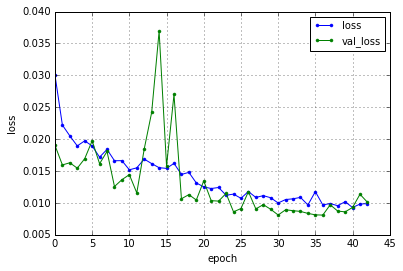

AccZ is registed now
Build Complete
(254742,)
windowData's num =7833
SourceData's aborting data = 22
window shape is (7833, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=32-SGD
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.0831 - val_loss: 0.0830
Epoch 2/50
2s - loss: 0.0830 - val_loss: 0.0829
Epoch 3/50
2s - loss: 0.0829 - val_loss: 0.0828
Epoch 4/50
2s - loss: 0.0828 - val_loss: 0.0828
Epoch 5/50
4s - loss: 0.0827 - val_loss: 0.0827
Epoch 6/50
3s - loss: 0.0826 - val_loss: 0.0826
Epoch 7/50
3s - loss: 0.0826 - val_loss: 0.0825
Epoch 8/50
2s - loss: 0.0825 - val_loss: 0.0825
Epoch 9/50
2s - loss: 0.0824 - val_loss: 0.0824
Epoch 10/50
3s - loss: 0.0824 - val_loss: 0.0823
Epoch 11/50
3s - loss: 0.0823 - val_loss: 0.0822
Epoch 12/50
3s - loss: 0.0822 - val_loss: 0.0822
Epoch 13/50
3s - loss: 0.0821 - val_loss: 0.0821
Epoch 14/50
2s - loss: 0.0820 - val_loss: 0.0820
Epoch 15/50
3s - loss: 0.0819 - val_loss: 0.0819
Epoch 16/50
3s - loss: 0.0818 - val_loss:

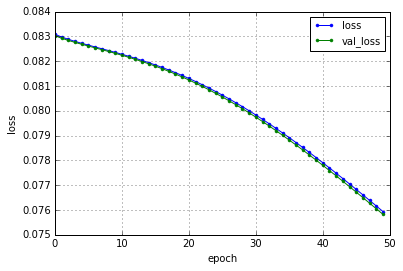

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adadelta
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.0757 - val_loss: 0.0661
Epoch 2/50
3s - loss: 0.0604 - val_loss: 0.0560
Epoch 3/50
3s - loss: 0.0530 - val_loss: 0.0503
Epoch 4/50
3s - loss: 0.0482 - val_loss: 0.0463
Epoch 5/50
2s - loss: 0.0447 - val_loss: 0.0432
Epoch 6/50
3s - loss: 0.0419 - val_loss: 0.0406
Epoch 7/50
3s - loss: 0.0395 - val_loss: 0.0383
Epoch 8/50
3s - loss: 0.0374 - val_loss: 0.0364
Epoch 9/50
3s - loss: 0.0355 - val_loss: 0.0347
Epoch 10/50
2s - loss: 0.0338 - val_loss: 0.0331
Epoch 11/50
2s - loss: 0.0323 - val_loss: 0.0316
Epoch 12/50
3s - loss: 0.0310 - val_loss: 0.0303
Epoch 13/50
2s - loss: 0.0298 - val_loss: 0.0294
Epoch 14/50
2s - loss: 0.0287 - val_loss: 0.0281
Epoch 15/50
2s - loss: 0.0277 - val_loss: 0.0271
Epoch 16/50
3s - loss: 0.0268 - val_loss: 0.0263
Epoch 17/50
3s - loss: 0.0261 - val_loss: 0.0260
Epoch 18/50
3s - loss: 0.0254 - val_loss: 0.0249
Epoch 19/50
2s - loss:

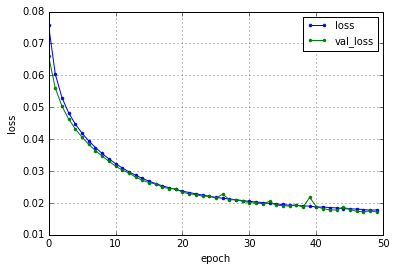

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adamax
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0345 - val_loss: 0.0217
Epoch 2/50
3s - loss: 0.0194 - val_loss: 0.0165
Epoch 3/50
2s - loss: 0.0165 - val_loss: 0.0175
Epoch 4/50
3s - loss: 0.0145 - val_loss: 0.0160
Epoch 5/50
4s - loss: 0.0133 - val_loss: 0.0128
Epoch 6/50
3s - loss: 0.0127 - val_loss: 0.0127
Epoch 7/50
4s - loss: 0.0123 - val_loss: 0.0131
Epoch 8/50
3s - loss: 0.0123 - val_loss: 0.0121
Epoch 9/50
3s - loss: 0.0120 - val_loss: 0.0119
Epoch 10/50
3s - loss: 0.0123 - val_loss: 0.0113
Epoch 11/50
3s - loss: 0.0119 - val_loss: 0.0111
Epoch 12/50
2s - loss: 0.0119 - val_loss: 0.0144
Epoch 13/50
2s - loss: 0.0118 - val_loss: 0.0130
Epoch 14/50
3s - loss: 0.0122 - val_loss: 0.0129
Epoch 15/50
4s - loss: 0.0117 - val_loss: 0.0120
Epoch 16/50
3s - loss: 0.0122 - val_loss: 0.0124
Epoch 17/50
3s - loss: 0.0120 - val_loss: 0.0109
Epoch 18/50
3s - loss: 0.0116 - val_loss: 0.0114
Epoch 19/50
2s - loss: 0

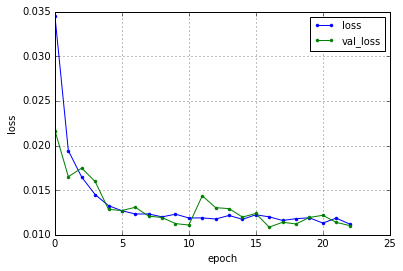

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adam
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0367 - val_loss: 0.0274
Epoch 2/50
2s - loss: 0.0236 - val_loss: 0.0238
Epoch 3/50
3s - loss: 0.0228 - val_loss: 0.0190
Epoch 4/50
3s - loss: 0.0197 - val_loss: 0.0179
Epoch 5/50
3s - loss: 0.0185 - val_loss: 0.0206
Epoch 6/50
3s - loss: 0.0170 - val_loss: 0.0156
Epoch 7/50
2s - loss: 0.0181 - val_loss: 0.0147
Epoch 8/50
3s - loss: 0.0167 - val_loss: 0.0144
Epoch 9/50
3s - loss: 0.0186 - val_loss: 0.0150
Epoch 10/50
3s - loss: 0.0161 - val_loss: 0.0175
Epoch 11/50
3s - loss: 0.0166 - val_loss: 0.0191
Epoch 12/50
2s - loss: 0.0158 - val_loss: 0.0152
Epoch 13/50
2s - loss: 0.0166 - val_loss: 0.0200
Epoch 14/50
3s - loss: 0.0154 - val_loss: 0.0147


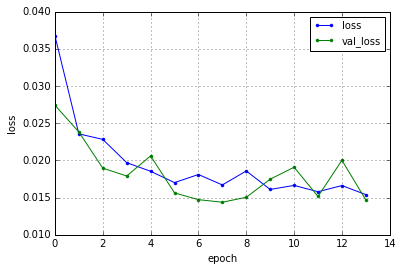

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adagrad
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.0347 - val_loss: 0.0269
Epoch 2/50
3s - loss: 0.0261 - val_loss: 0.0242
Epoch 3/50
4s - loss: 0.0229 - val_loss: 0.0250
Epoch 4/50
3s - loss: 0.0207 - val_loss: 0.0194
Epoch 5/50
3s - loss: 0.0189 - val_loss: 0.0225
Epoch 6/50
3s - loss: 0.0181 - val_loss: 0.0182
Epoch 7/50
3s - loss: 0.0166 - val_loss: 0.0152
Epoch 8/50
3s - loss: 0.0164 - val_loss: 0.0165
Epoch 9/50
3s - loss: 0.0159 - val_loss: 0.0144
Epoch 10/50
3s - loss: 0.0149 - val_loss: 0.0137
Epoch 11/50
3s - loss: 0.0150 - val_loss: 0.0148
Epoch 12/50
3s - loss: 0.0142 - val_loss: 0.0131
Epoch 13/50
3s - loss: 0.0140 - val_loss: 0.0130
Epoch 14/50
3s - loss: 0.0138 - val_loss: 0.0125
Epoch 15/50
2s - loss: 0.0138 - val_loss: 0.0136
Epoch 16/50
3s - loss: 0.0131 - val_loss: 0.0125
Epoch 17/50
3s - loss: 0.0137 - val_loss: 0.0127
Epoch 18/50
2s - loss: 0.0134 - val_loss: 0.0122
Epoch 19/50
2s - loss: 

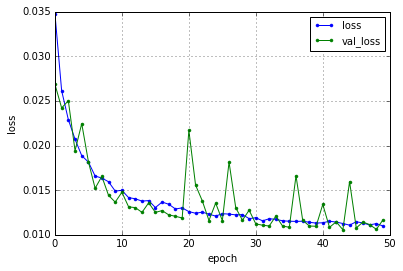

hiden node = 16
-edim=16-Window=4096-Overlap=32-RMSprop
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0349 - val_loss: 0.0364
Epoch 2/50
2s - loss: 0.0262 - val_loss: 0.0285
Epoch 3/50
3s - loss: 0.0247 - val_loss: 0.0313
Epoch 4/50
3s - loss: 0.0241 - val_loss: 0.0314
Epoch 5/50
3s - loss: 0.0239 - val_loss: 0.0205
Epoch 6/50
3s - loss: 0.0239 - val_loss: 0.0256
Epoch 7/50
4s - loss: 0.0236 - val_loss: 0.0203
Epoch 8/50
2s - loss: 0.0236 - val_loss: 0.0200
Epoch 9/50
3s - loss: 0.0234 - val_loss: 0.0219
Epoch 10/50
3s - loss: 0.0233 - val_loss: 0.0221
Epoch 11/50
3s - loss: 0.0237 - val_loss: 0.0227
Epoch 12/50
3s - loss: 0.0231 - val_loss: 0.0201
Epoch 13/50
2s - loss: 0.0234 - val_loss: 0.0344
Epoch 14/50
2s - loss: 0.0232 - val_loss: 0.0273


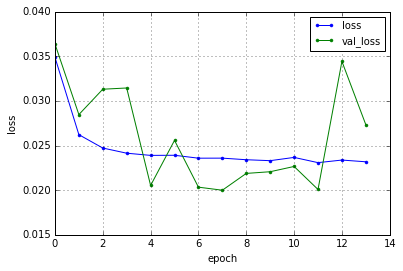

hiden node = 16
-edim=16-Window=4096-Overlap=32-Nadam
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0384 - val_loss: 0.0321
Epoch 2/50
2s - loss: 0.0313 - val_loss: 0.0309
Epoch 3/50
2s - loss: 0.0305 - val_loss: 0.0324
Epoch 4/50
3s - loss: 0.0304 - val_loss: 0.0284
Epoch 5/50
3s - loss: 0.0296 - val_loss: 0.0316
Epoch 6/50
2s - loss: 0.0301 - val_loss: 0.0307
Epoch 7/50
2s - loss: 0.0296 - val_loss: 0.0302
Epoch 8/50
2s - loss: 0.0294 - val_loss: 0.0292
Epoch 9/50
2s - loss: 0.0294 - val_loss: 0.0287
Epoch 10/50
2s - loss: 0.0294 - val_loss: 0.0272
Epoch 11/50
3s - loss: 0.0293 - val_loss: 0.0314
Epoch 12/50
3s - loss: 0.0286 - val_loss: 0.0274
Epoch 13/50
3s - loss: 0.0285 - val_loss: 0.0288
Epoch 14/50
3s - loss: 0.0295 - val_loss: 0.0300
Epoch 15/50
3s - loss: 0.0290 - val_loss: 0.0272
Epoch 16/50
3s - loss: 0.0283 - val_loss: 0.0277
Epoch 17/50
3s - loss: 0.0280 - val_loss: 0.0259
Epoch 18/50
3s - loss: 0.0274 - val_loss: 0.0269
Epoch 19/50
3s - loss: 0.

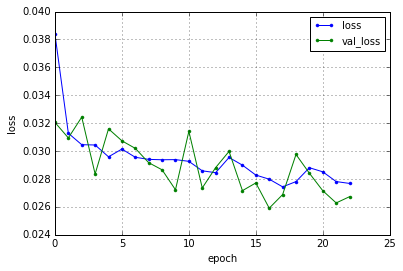

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
